Aim of this project is to create a model that predicts the medical insurance cost based on a given data

## Importing data and libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as ltg
from sklearn.model_selection import GridSearchCV
import pickle

In [3]:
insurance = pd.read_csv('insurance.csv')
insurance.head()
#inspecting the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no missing values and all columns have correct type

In [6]:
insurance.describe()
# Checking for any unusual values in descriptive statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Visualization

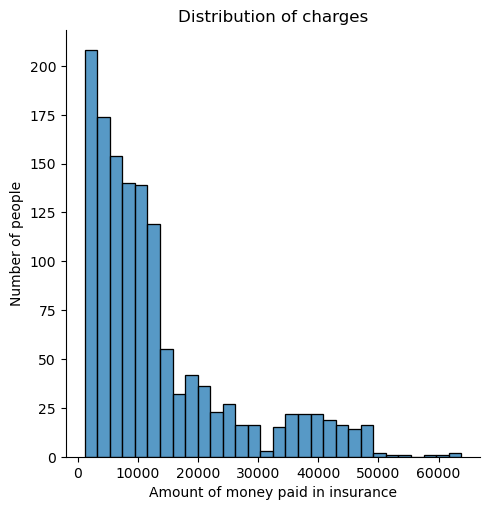

<Figure size 640x480 with 0 Axes>

In [7]:
sns.displot(data=insurance, x='charges')
plt.title('Distribution of charges')
plt.ylabel('Number of people')
plt.xlabel('Amount of money paid in insurance')
plt.show()
plt.clf()

The values are not normally distributed and histogram is right-skewed. Checking the distribution of other variables now.

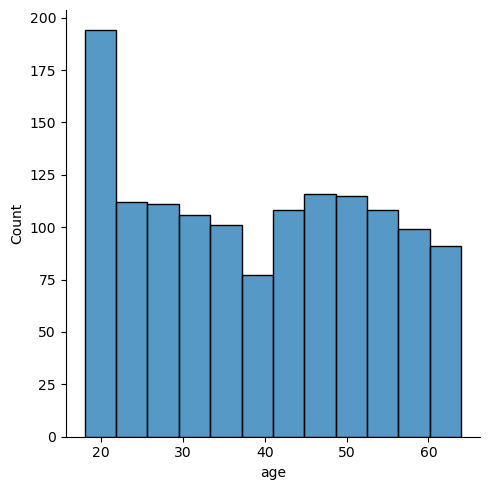

<Figure size 640x480 with 0 Axes>

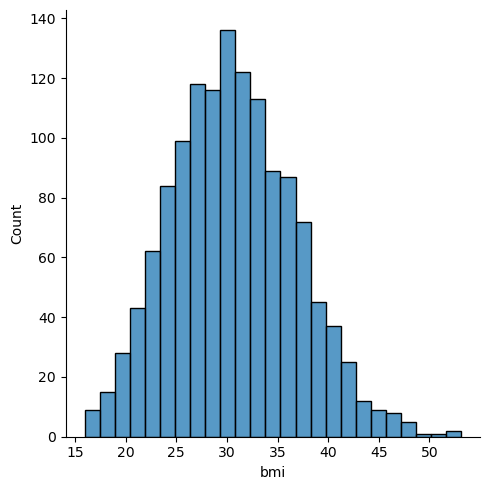

<Figure size 640x480 with 0 Axes>

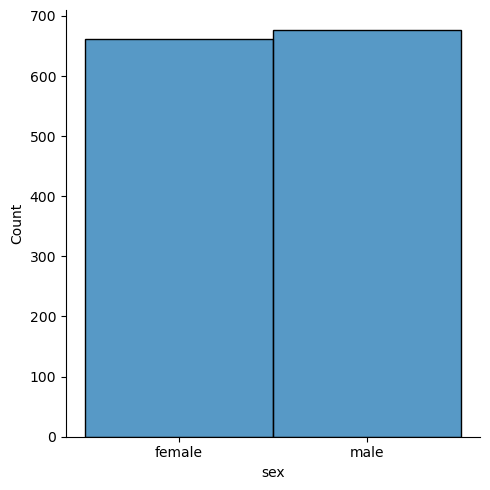

<Figure size 640x480 with 0 Axes>

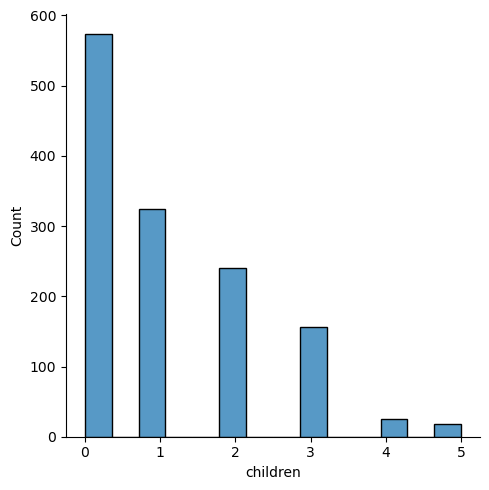

<Figure size 640x480 with 0 Axes>

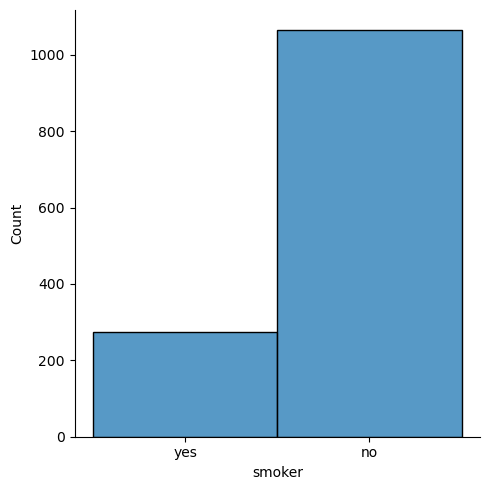

<Figure size 640x480 with 0 Axes>

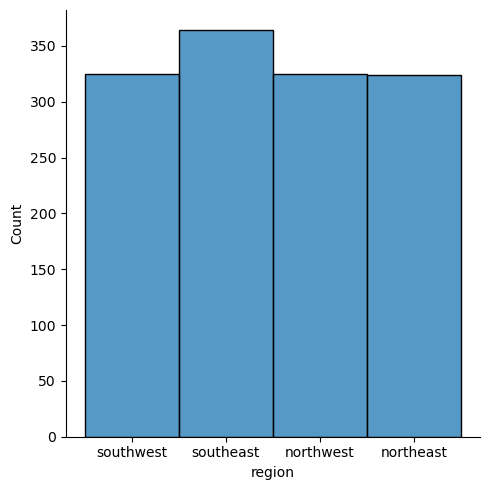

In [8]:
columns = ['age', 'bmi', 'sex', 'children', 'smoker', 'region']
for i in range(0, len(columns)):
    sns.displot(data=insurance, x=columns[i])
    plt.tight_layout()
    plt.show()
    plt.clf()
#Visualizing numerical data

Here, we can see that BMI is normally distributed, however age is more equally distributed except the group of 18-20 year olds. Sex is also equally distributed. Most people in this dataset have no children and it is probably because young people are prevalent here. Majority of people don't smoke and regions are approximately equally distributed aswell.

In [9]:
cat_variables = pd.get_dummies(insurance[['sex', 'region', 'smoker']])
insurance_dummy = pd.concat([insurance, cat_variables], axis=1)
insurance_dummy.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)
insurance_dummy.head()
#Using one-hot encoding for regression models

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


## Building a model

In [10]:
X = insurance_dummy.drop(['charges'], axis=1)
y = insurance_dummy['charges']
# Creating target variable - price and dependent variables in 'X'

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# Splitting into train and test data

(1003, 11) (335, 11) (1003,) (335,)


### Linear Regression

In [11]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)
linear_pred = linear_model.predict(x_test)

rmse_score_linear = np.sqrt(mean_squared_error(y_test, linear_pred))
r2_linear = r2_score(y_test, linear_pred)

print('RMSE score is: ' + str(rmse_score_linear))
print('R2 value is equal to: ' + str(r2_linear))

RMSE score is: 5668.840025911985
R2 value is equal to: 0.7958786376014413


### Ridge Regression

In [12]:
ridge = Ridge()

ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

rmse_score_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
r2_ridge = r2_score(y_test, ridge_pred)

print('RMSE score is: ' + str(rmse_score_ridge))
print('R2 value is equal to: ' + str(r2_ridge))

RMSE score is: 5670.534164293598
R2 value is equal to: 0.7957566156337128


### SVR

In [13]:
svr = SVR()

svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

rmse_score_svr = np.sqrt(mean_squared_error(y_test, svr_pred))
r2_svr = r2_score(y_test, svr_pred)

print('RMSE score is: ' + str(rmse_score_svr))
print('R2 value is equal to: ' + str(r2_svr))

RMSE score is: 13146.246049802021
R2 value is equal to: -0.09775030988118782


### Random Forest Regression

In [24]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

grid_search_RF = GridSearchCV(estimator=RF, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_search_RF.fit(x_train, y_train)
grid_search_RF.best_params_
#checking for the best parameters in Random Forest Regression using GridSearchCV

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

In [22]:
RF = RandomForestRegressor(bootstrap = True, max_depth = 110, max_features = 3, min_samples_leaf = 3,
                           min_samples_split = 8, n_estimators = 300)

RF.fit(x_train, y_train)
RF_pred = RF.predict(x_test)

rmse_score_RF = np.sqrt(mean_squared_error(y_test, RF_pred))
r2_RF = r2_score(y_test, RF_pred)

print('RMSE score is: ' + str(rmse_score_RF))
print('R2 value is equal to: ' + str(r2_RF))

RMSE score is: 4231.808359917487
R2 value is equal to: 0.8862498338030838


### LightGBM Regression

In [16]:
ltgr = ltg.LGBMRegressor()
ltgr.fit(x_train, y_train)
ltgr_pred = ltgr.predict(x_test)

rmse_score_ltgr = np.sqrt(mean_squared_error(y_test, ltgr_pred))
r2_ltgr = r2_score(y_test, ltgr_pred)

print('RMSE score is: ' + str(rmse_score_ltgr))
print('R2 value is equal to: ' + str(r2_ltgr))

RMSE score is: 4377.288003926232
R2 value is equal to: 0.8782944734945447


## Conclusion

After creating a few models that predict prices of insurance, based on:
1. Age
2. Sex
3. BMI
4. Number of children
5. Being smoker or not
6. Region of living

The model that predicts price the most accurate is Random Forest Regressor. It explains about 89% of the variance in data, and its RMSE is equal to 4231.